In [11]:
#plot network resource: https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675
#roadgraph of BCN?: https://opendata-ajuntament.barcelona.cat/data/en/dataset/mapa-graf-viari-carrers-wms/resource/d0ca0925-3e38-49a3-91d4-f7feb23f8efc
import os
import sys
import numpy as np
import pandas as pd
import openmatrix as omx
import networkx as nx
from matplotlib import pyplot as plt
import geopandas as gpd

In [33]:
data_path = os.path.dirname(os.getcwd()) + '/Storied-Streets-of-Barcelona/Data/'

In [26]:
# Function to import OMX matrices
def import_matrix(matfile):
    f = open(matfile, 'r')
    all_rows = f.read()
    blocks = all_rows.split('Origin')[1:]
    matrix = {}
    for k in range(len(blocks)):
        orig = blocks[k].split('\n')
        dests = orig[1:]
        orig=int(orig[0])
        d = [eval('{'+a.replace(';',',').replace(' ','') +'}') for a in dests]
        destinations = {}
        for i in d:
            destinations = {**destinations, **i}
        matrix[orig] = destinations
    zones = max(matrix.keys())
    mat = np.zeros((zones, zones))
    for i in range(zones):
        for j in range(zones):
            # We map values to a index i-1, as Numpy is base 0
            mat[i, j] = matrix.get(i+1,{}).get(j+1,0)

    index = np.arange(zones) + 1
    return mat

In [27]:
# Network
netfile = os.path.join(data_path,'TransportationNetworks','Barcelona_net.tntp')
net = pd.read_csv(netfile, skiprows=8, sep='\t')
trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed
net.drop(['~', ';'], axis=1, inplace=True)

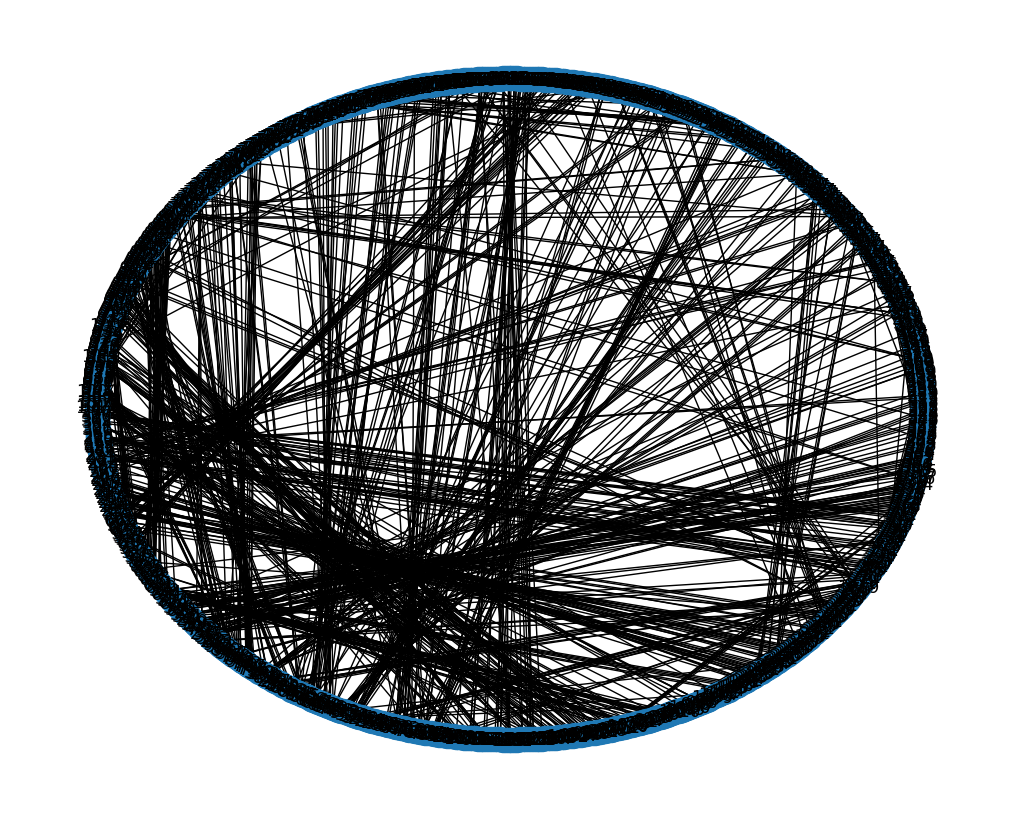

In [28]:
G = nx.from_pandas_edgelist(net, 'init_node', 'term_node')
plt.figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [36]:
# Trips
tripfile = os.path.join(data_path, 'TransportationNetworks','Barcelona_trips.tntp')
trips = import_matrix(tripfile)
trips

array([[  0. ,   0. , 402.1, ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [41]:
roadnamesfiles = os.path.join(data_path, '0402040100_BCN_Retolacio_Vials','0402040100_BCN_Retolacio_Vials.shp')
roadnames = gpd.read_file(roadfile)
roadnames

,ID_UBICA,IDENT_ANEX,ANEXO_DESC,IDENT_TEMA,TEMA_DESCR,IDENT_CONJ,CONJUNT_DE,IDENT_SUBC,SUBCONJUNT,IDENT_ELEM,...,NIVELL_DES,NIVELL_D_1,NIVELL_D_2,CODI,NOM,SUBTIPUS,DATA_ALTA,DATA_EDICI,ANGLE_TXT,geometry
0,151,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010206,...,Topònim Espai Mitjà,Topónimo Espacio Mediano,Toponym Small Square,701332,Plaça de Meguidó,Plaça petita,20160222000000,20201119000000,360.0000,POINT (427906.977 4586420.781)
1,152,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010206,...,Topònim Espai Mitjà,Topónimo Espacio Mediano,Toponym Small Square,700705,Plaça de Palestina,Plaça petita,20160222000000,20200923000000,360.0000,POINT (428091.250 4586280.139)
2,153,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010206,...,Topònim Espai Mitjà,Topónimo Espacio Mediano,Toponym Small Square,701606,Jardí del Lledoner,Plaça petita,20160222000000,NaN,360.0000,POINT (428052.068 4586232.835)
3,154,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010206,...,Topònim Espai Mitjà,Topónimo Espacio Mediano,Toponym Small Square,352405,Plaça de la Vall d'Hebron,Plaça petita,20160222000000,NaN,360.0000,POINT (428233.597 4585922.721)
4,155,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010206,...,Topònim Espai Mitjà,Topónimo Espacio Mediano,Toponym Small Square,701656,Plaça de Numen Mestre,Plaça petita,20160222000000,20190522000000,360.0000,POINT (428388.226 4586110.948)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,9780,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010203,...,Topònim via urbana Molt Estreta,Topónimo via urbana Muy Estrecha,Toponym via urban Narrow Type 2 < Narrow Type 1,197903,Passeig Marítim de la Barceloneta,Estret 2,20160602000000,20201130000000,76.2537,POINT (432275.654 4580702.783)
8782,9936,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010202,...,Topònim via urbana Mitjana,Topónimo via urbana Mediana,Toponym via urban narrow,700059,Carretera de Vallvidrera a les Planes,Estret,20160705000000,20160705000000,-1.9982,POINT (423911.967 4586744.962)
8783,9928,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010201,...,Topònim via urbana Molt Ample,Topónimo via urbana Muy Ancha,Toponym via urban Very Wide,700693,Port Olímpic,Molt Ample,20160704000000,20160704000000,0.0000,POINT (433124.459 4582016.187)
8784,9932,01,Annex I,0105,Adreces,010501,Adreces,01050102,Retolació de carrers,0105010205,...,Topònim Espai Gran,Topónimo Espacio Grande,Toponym Average Square,213170,Jardins del Mirador,Plaça mitjana,20160704000000,20201006000000,360.0000,POINT (430471.488 4579860.244)


<Axes: >

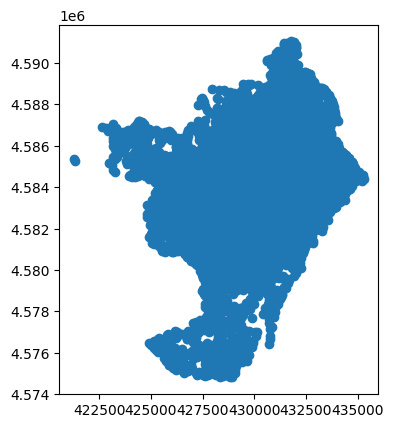

In [43]:
roadnames.plot()

In [46]:
roadfile = os.path.join(data_path,'BCN_GrafVial_SHP', 'BCN_GrafVial_Nodes_ETRS89_SHP.shp')
roads = gpd.read_file(roadfile)

<Axes: >

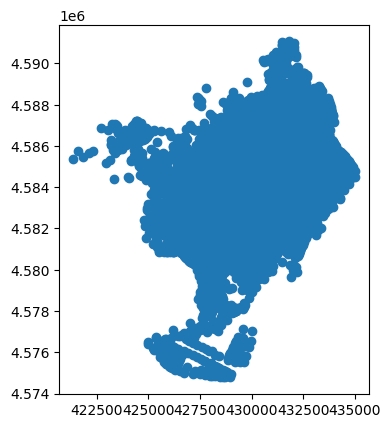

In [47]:
roads.plot()